In [ ]:
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_id = '1y2Ily2WiJ7xQw3IT_zgR0efUgO7vtax3'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('covid.csv')
!ls -lha covid.csv
!pip install -q xlrd

import pandas as pd
df = pd.read_csv('covid.csv')
df

-rw-r--r-- 1 root root 19M Jun  4 17:25 covid.csv


,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,China
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,Other
316796,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,Other
316797,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,Other
316798,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,Other


In [ ]:
df.columns 

Index(['Fever', 'Tiredness', 'Dry-Cough', 'Difficulty-in-Breathing',
       'Sore-Throat', 'None_Sympton', 'Pains', 'Nasal-Congestion',
       'Runny-Nose', 'Diarrhea', 'None_Experiencing', 'Age_0-9', 'Age_10-19',
       'Age_20-24', 'Age_25-59', 'Age_60+', 'Gender_Female', 'Gender_Male',
       'Gender_Transgender', 'Severity_Mild', 'Severity_Moderate',
       'Severity_None', 'Severity_Severe', 'Contact_Dont-Know', 'Contact_No',
       'Contact_Yes', 'Country'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Fever                    316800 non-null  int64 
 1   Tiredness                316800 non-null  int64 
 2   Dry-Cough                316800 non-null  int64 
 3   Difficulty-in-Breathing  316800 non-null  int64 
 4   Sore-Throat              316800 non-null  int64 
 5   None_Sympton             316800 non-null  int64 
 6   Pains                    316800 non-null  int64 
 7   Nasal-Congestion         316800 non-null  int64 
 8   Runny-Nose               316800 non-null  int64 
 9   Diarrhea                 316800 non-null  int64 
 10  None_Experiencing        316800 non-null  int64 
 11  Age_0-9                  316800 non-null  int64 
 12  Age_10-19                316800 non-null  int64 
 13  Age_20-24                316800 non-null  int64 
 14  Age_25-59           

In [ ]:
df.shape

(316800, 27)

In [ ]:
indicators = ['Fever', 'Tiredness', 'Dry-Cough','Difficulty-in-Breathing', 'Sore-Throat', 'None_Sympton', 'Pains','Nasal-Congestion','Runny-Nose','Diarrhea','Age_25-59','Age_60+','Contact_Yes']
target_columns = ['Severity_Mild', 'Severity_Moderate', 'Severity_None', 'Severity_Severe']
features = df[indicators]
targets = df[target_columns]
display(features.head(), targets.head())

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,Age_25-59,Age_60+,Contact_Yes
0,1,1,1,1,1,0,1,1,1,1,0,0,1
1,1,1,1,1,1,0,1,1,1,1,0,0,0
2,1,1,1,1,1,0,1,1,1,1,0,0,0
3,1,1,1,1,1,0,1,1,1,1,0,0,1
4,1,1,1,1,1,0,1,1,1,1,0,0,0


,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,0,1,0,0
4,0,1,0,0


In [ ]:
condition = []
cond_dict = {
    0: "Mild",
    1: "Moderate",
    2: "None",
    3: "Severe"
}
for i in targets.values:
    idx = np.where(i == 1)[0][0]
    condition.append(cond_dict[idx])
targets['Condition'] = condition
targets

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Condition
0,1,0,0,0,Mild
1,1,0,0,0,Mild
2,1,0,0,0,Mild
3,0,1,0,0,Moderate
4,0,1,0,0,Moderate
...,...,...,...,...,...
316795,0,0,0,1,Severe
316796,0,0,0,1,Severe
316797,0,0,1,0,None
316798,0,0,1,0,None


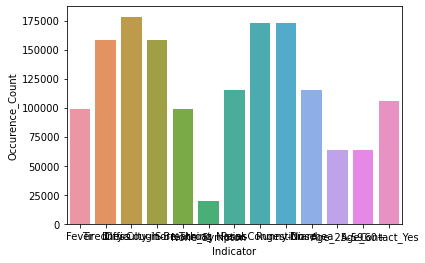

In [ ]:
temp = []
for i in indicators:
    temp.append(sum(features[i].values))
temp_df = pd.DataFrame({"Indicator":indicators, "Occurence_Count":temp})
sns.barplot(data = temp_df, x="Indicator", y="Occurence_Count")

Top indicators(symptoms) concluded are:

1.Difficulty in breathing

2.Tiredness

3.Sore throat


4.Body pains


In [ ]:
data = features
data['Condition'] = targets['Condition'].values
data=data.iloc[0:316800,0:13]
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,Age_25-59,Age_60+,Contact_Yes
0,1,1,1,1,1,0,1,1,1,1,0,0,1
1,1,1,1,1,1,0,1,1,1,1,0,0,0
2,1,1,1,1,1,0,1,1,1,1,0,0,0
3,1,1,1,1,1,0,1,1,1,1,0,0,1
4,1,1,1,1,1,0,1,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,0,1,0,0,0,0,0,1,0
316796,0,0,0,0,0,1,0,0,0,0,0,1,0
316797,0,0,0,0,0,1,0,0,0,0,0,1,1
316798,0,0,0,0,0,1,0,0,0,0,0,1,0


In [ ]:
data.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,Age_25-59,Age_60+,Contact_Yes
0,1,1,1,1,1,0,1,1,1,1,0,0,1
1,1,1,1,1,1,0,1,1,1,1,0,0,0
2,1,1,1,1,1,0,1,1,1,1,0,0,0
3,1,1,1,1,1,0,1,1,1,1,0,0,1
4,1,1,1,1,1,0,1,1,1,1,0,0,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [ ]:

y=data.iloc[0:316800,9].values
y=lb.fit_transform(y)
y

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
x=data.iloc[:,0:9].values
x

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
from sklearn.model_selection import train_test_split   #spliting the data in train set and test set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
import sklearn
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver='lbfgs',max_iter=10000)
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
y_pred

array([1, 1, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[31119,  9108],
       [14121,  9012]])

In [ ]:
#prediction accuracy=

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf=RandomForestClassifier(n_estimators=3,criterion='entropy')
classifier_rf.fit(x_train,y_train)
y_pred=classifier_rf.predict(x_test)
confusion_matrix(y_test,y_pred)

array([[42386,     0],
       [20974,     0]])

In [ ]:
#prediction accuracy=

In [ ]:

from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier() #neigh => model
neigh.fit(x_train, y_train) #training the data
predictions = neigh.predict(x_test)   #X-test ---> Y_test

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.76      0.62      0.68     40227
           1       0.50      0.65      0.57     23133

    accuracy                           0.63     63360
   macro avg       0.63      0.64      0.63     63360
weighted avg       0.66      0.63      0.64     63360



In [ ]:
confusion_matrix(y_test,predictions)

array([[ 6, 13, 12,  5],
       [20, 10, 14, 16],
       [13, 15, 15,  7],
       [18, 14, 14,  8]])

In [ ]:
#prediction accuracy=

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtr = DecisionTreeClassifier(random_state=0)
dtr.fit(x_train, y_train)
predictions = dtr.predict(x_test)


In [ ]:
from sklearn.metrics import classification_report
target_names = ['Severity_Mild', 'Severity_Moderate', 'Severity_None', 'Severity_Severe']
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80     42386
           1       0.00      0.00      0.00     20974

    accuracy                           0.67     63360
   macro avg       0.33      0.50      0.40     63360
weighted avg       0.45      0.67      0.54     63360



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
confusion_matrix(y_test,predictions)

array([[18, 11,  3,  4],
       [48,  2,  6,  4],
       [41,  6,  0,  3],
       [41, 11,  2,  0]])

In [ ]:
#prediction accuracy=67%

In [ ]:
import sklearn
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
%matplotlib inline

In [ ]:
key = ['LogisticRegression','KNeighborsClassifier','SVC','DecisionTreeClassifier','RandomForestClassifier','GradientBoostingClassifier','AdaBoostClassifier','XGBClassifier']
value = [LogisticRegression(solver='lbfgs',max_iter=10000),KNeighborsClassifier(),SVC(kernel='rbf'),DecisionTreeClassifier(),RandomForestClassifier(),GradientBoostingClassifier(),AdaBoostClassifier(),xgb.XGBClassifier()]
models = dict(zip(key,value))

In [ ]:
for name,algo in models.items():
  model=algo
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)        
  print(name)
  print(confusion_matrix(y_test,y_pred))
  print(accuracy_score(y_test,y_pred))

LogisticRegression
[[31119  9108]
 [14121  9012]]
0.6333806818181819
KNeighborsClassifier
[[25088 15139]
 [ 7999 15134]]
0.6348169191919192
SVC
[[29430 10797]
 [12915 10218]]
0.6257575757575757
DecisionTreeClassifier
[[29379 10848]
 [12879 10254]]
0.6255208333333333
RandomForestClassifier
[[28705 11522]
 [12190 10943]]
0.6257575757575757
GradientBoostingClassifier
[[30178 10049]
 [13511  9622]]
0.6281565656565656
AdaBoostClassifier
[[31119  9108]
 [14121  9012]]
0.6333806818181819
XGBClassifier
[[29827 10400]
 [13178  9955]]
0.6278724747474748
